# Logistic Regression with a Neural Network mindset

Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

# Implementing a Neural Network from Scratch in Python

In this example we will imlement a simple 3-layer neural network from scratch.

In [1]:
# Import libraries
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegressionCV
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Display the plots inline
%matplotlib inline
# Change default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generating a dataset
Let's start by generating a dataset we can play with. We will go with the [make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

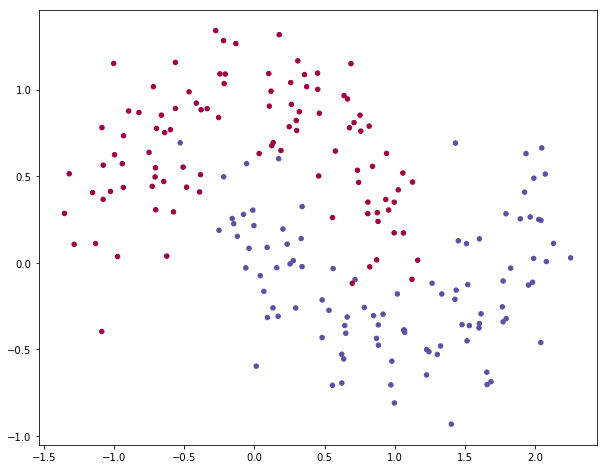

In [3]:
## Generate a dataset and plot it
np.random.seed(0)
X, y = make_moons(200, noise=0.2)
plt.scatter(X[:,0], X[:,1], s=20, c=y, cmap=plt.cm.Spectral)

## Logistic regression
First let's train a Logistic Regression classifier.

In [4]:
# Train the logistic regression classifier
clf = LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [5]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

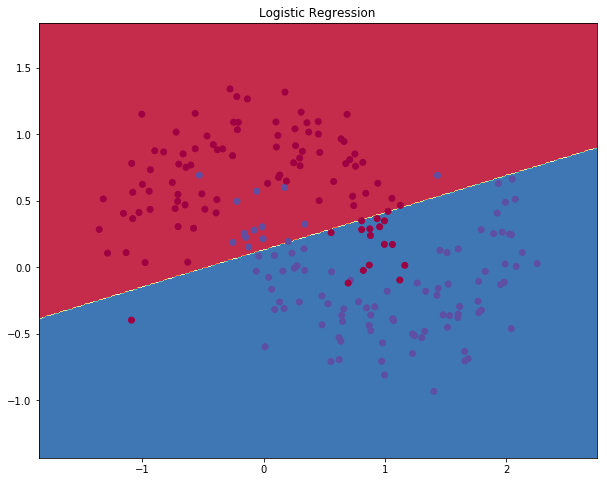

In [6]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

## Training a Neural Network
Now let's build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 2. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. The input to the network will be x- and y- coordinates and its output will be two probabilities, one for class 0 and one for class 1.

In [7]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

In [8]:
# Gradient descent parameters
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [9]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    # softmax on the last layer
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    # Add regularization term to loss
    data_loss += (reg_lambda/2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return ((1./num_examples) * data_loss)

In [10]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    # softmax on the last layer
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [11]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    #b1 = np.random.rand(1, nn_hdim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    #b2 = np.random.rand(1, nn_output_dim)
    b2 = np.zeros((1, nn_output_dim))
    
    # This is what we return at the end
    model = {}
    
    # Gradient descent for each pass
    for i in range(0, num_passes):
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        # softmax on the last layer
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # Add regularization terms(b1 and b2 don't have regularization terms)
        dW2 += (reg_lambda * W2)
        dW1 += (reg_lambda * W1)
        
        # Gradient descent parameter update
        W1 -= (epsilon * dW1)
        b1 -= (epsilon * db1)
        W2 -= (epsilon * dW2)
        b2 -= (epsilon * db2)
        
        # Assign new parameters to the model
        model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        # Print the loss.
        # This is expensive because it uses the whole dataset, so we dont want to do it too often.
        if print_loss and ((i%1000) == 0):
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
            
    return model
    

## A network with hidden layer of size 3

Loss after iteration 0: 0.676446
Loss after iteration 1000: 0.069043
Loss after iteration 2000: 0.071350
Loss after iteration 3000: 0.071226
Loss after iteration 4000: 0.071263
Loss after iteration 5000: 0.071286
Loss after iteration 6000: 0.071299
Loss after iteration 7000: 0.071307
Loss after iteration 8000: 0.071311
Loss after iteration 9000: 0.071314
Loss after iteration 10000: 0.071315
Loss after iteration 11000: 0.071316
Loss after iteration 12000: 0.071316
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


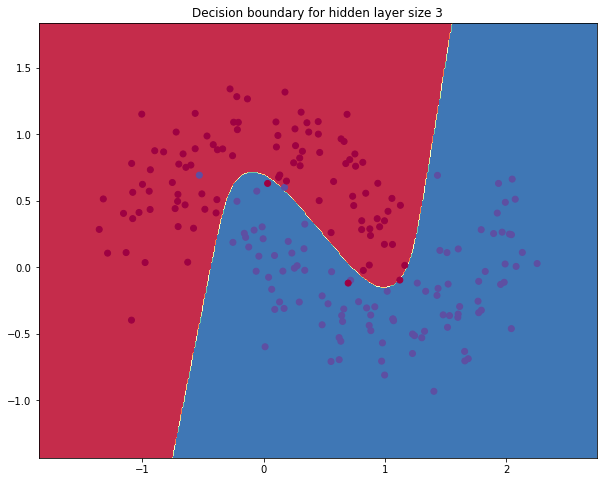

In [12]:
# Build a model with hidden layer of size 3
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision boundary for hidden layer size 3")